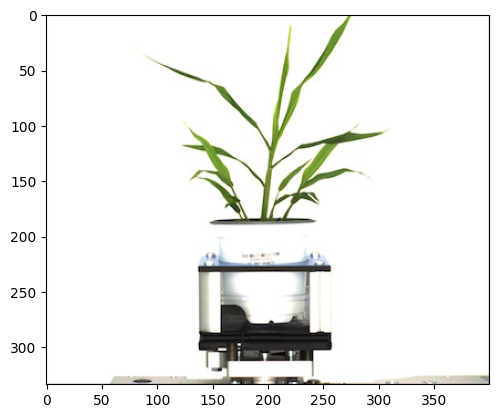

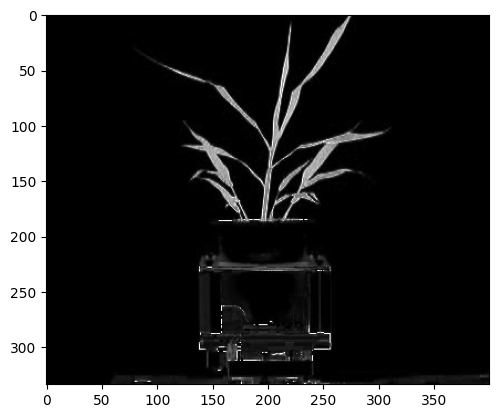

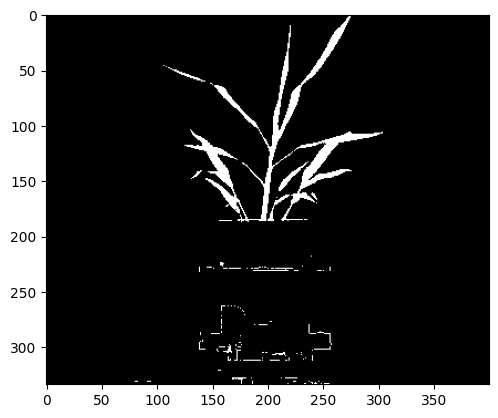

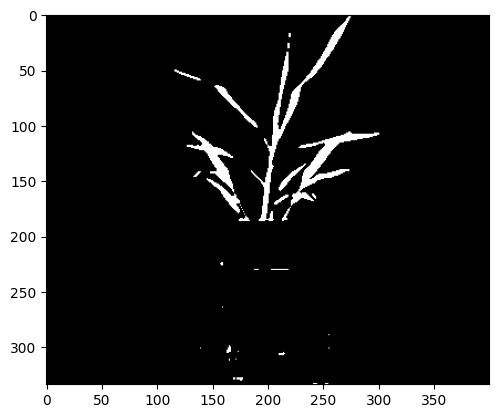

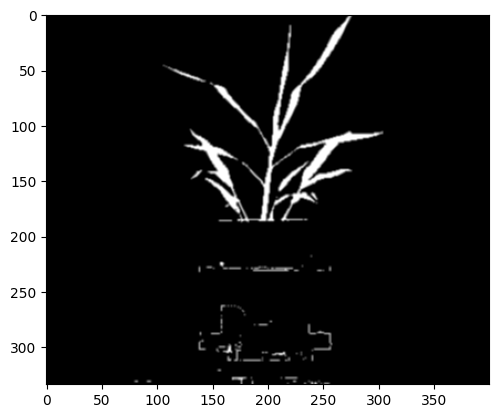

In [2]:
# Import libraries
import os
import numpy as np
import cv2
from plantcv import plantcv as pcv
pcv.params.debug = "plot"
# pip install plantcv
# pip install plantcv jupyterlab ipympl

# load image
img, path, filename = pcv.readimage(filename="img/original_image.jpg")

s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, object_type='light')

s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=3)
gaussian_img = pcv.gaussian_blur(img=s_thresh,ksize=(3, 3), sigma_x=0, sigma_y=None)

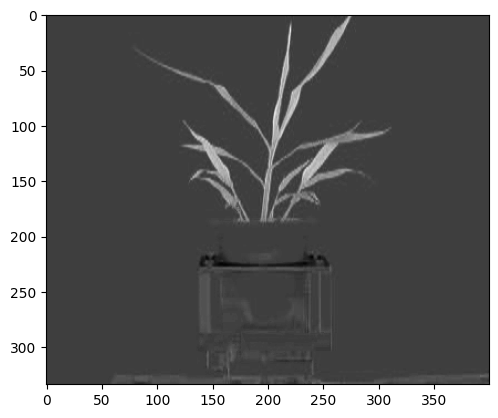

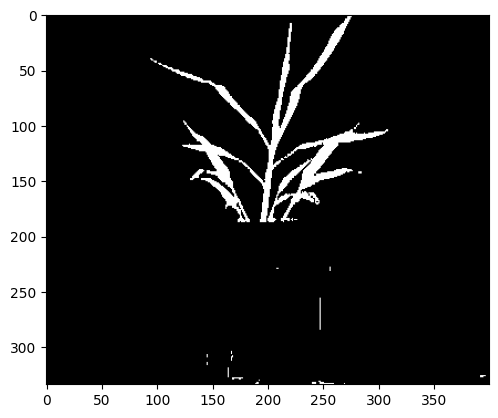

In [5]:
# Convert RGB to LAB
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')
b_thresh = pcv.threshold.binary(gray_img=b, threshold=140, object_type='light')

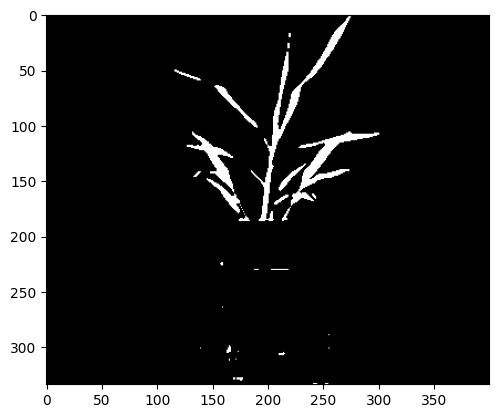

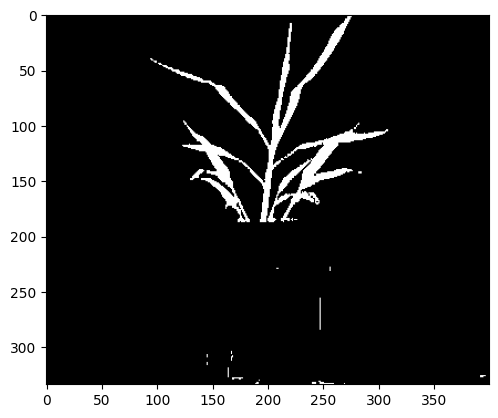

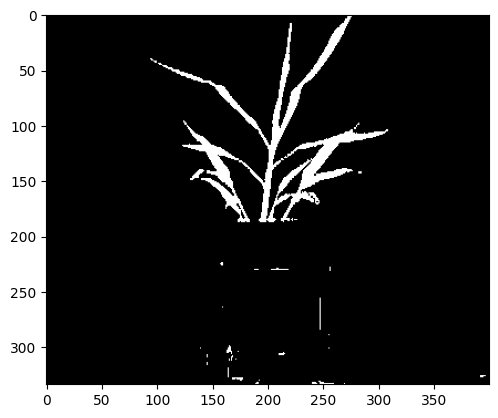

In [7]:
# gaussian blur와 b_thresh를 or 연산
pcv.plot_image(s_mblur)
pcv.plot_image(b_thresh)
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)

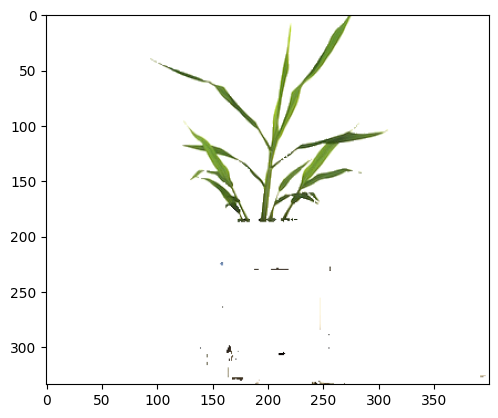

In [8]:
# masked image 생성
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')

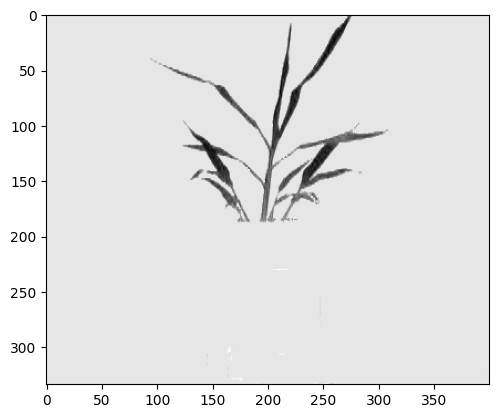

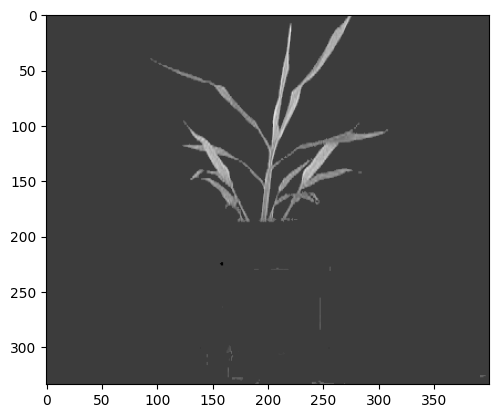

In [9]:
# Convert RGB to LAB
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')